## Fase 4: Modelagem Preditiva (Regressão Supervisionada)

Nesta fase, aplicaremos técnicas de Machine Learning supervisionado, especificamente regressão, para prever o rendimento de safras com base nas condições climáticas e de solo. Implementaremos cinco modelos diferentes de regressão, seguindo as boas práticas de Machine Learning, como normalização dos dados, divisão em conjuntos de treino e teste, e avaliação usando métricas apropriadas.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [2]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [3]:
# Definindo as features (X) e o target (y)
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
           'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Crop']

# Convertendo a coluna categórica 'Crop' em dummies
X = pd.get_dummies(df[features], columns=['Crop'], drop_first=False)
y = df['Yield']

# Exibindo as primeiras linhas para verificação
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,2248.92,17.72,83.40,26.01,True,False,False,False
1,1938.42,17.54,82.11,26.11,True,False,False,False
2,2301.54,17.81,82.79,26.24,True,False,False,False
3,2592.35,17.61,85.07,25.56,True,False,False,False
4,2344.72,17.61,84.12,25.76,True,False,False,False



Target (y):


0    11560
1    11253
2     9456
3     9321
4     8800
Name: Yield, dtype: int64

In [4]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 124 amostras
Tamanho do conjunto de teste: 32 amostras


In [5]:
# Identificando colunas numéricas para normalização
# Excluímos as colunas dummy de 'Crop' da normalização
numeric_cols = [col for col in X.columns if not col.startswith('Crop_')]

# Criando um preprocessador para aplicar normalização apenas às colunas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # As colunas dummy permanecem inalteradas
)

# Aplicando a transformação
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convertendo para DataFrame para melhor visualização (opcional)
# Primeiro para as colunas numéricas normalizadas, depois para as colunas dummy
X_train_processed_df = pd.DataFrame(X_train_processed[:, :len(numeric_cols)], 
                                 columns=numeric_cols)

print("Primeiras linhas das features numéricas normalizadas:")
display(X_train_processed_df.head())

Primeiras linhas das features numéricas normalizadas:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,-0.403713,1.632363,-0.635284,2.212663
1,-0.609950,0.066305,-0.189106,0.206978
2,-0.530297,-0.357836,-0.040380,-0.313014
3,-0.793705,-0.618846,-0.427068,-0.313014
4,-0.906047,-0.553593,-0.278342,-0.350156


Regressão Linear - Métricas de Avaliação:
MAE: 3132.80
MSE: 19308693.24
RMSE: 4394.17
R²: 0.9950


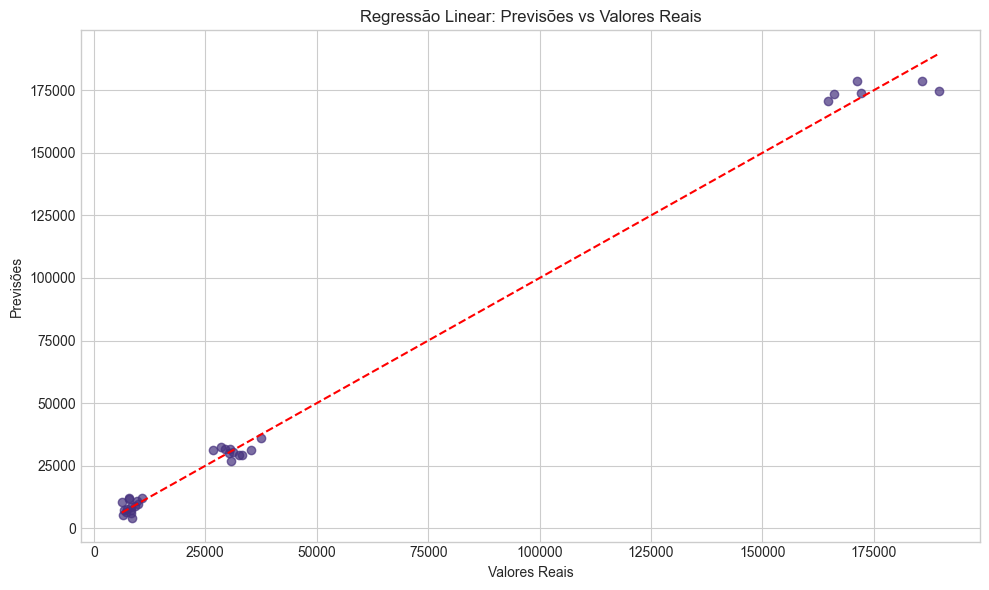

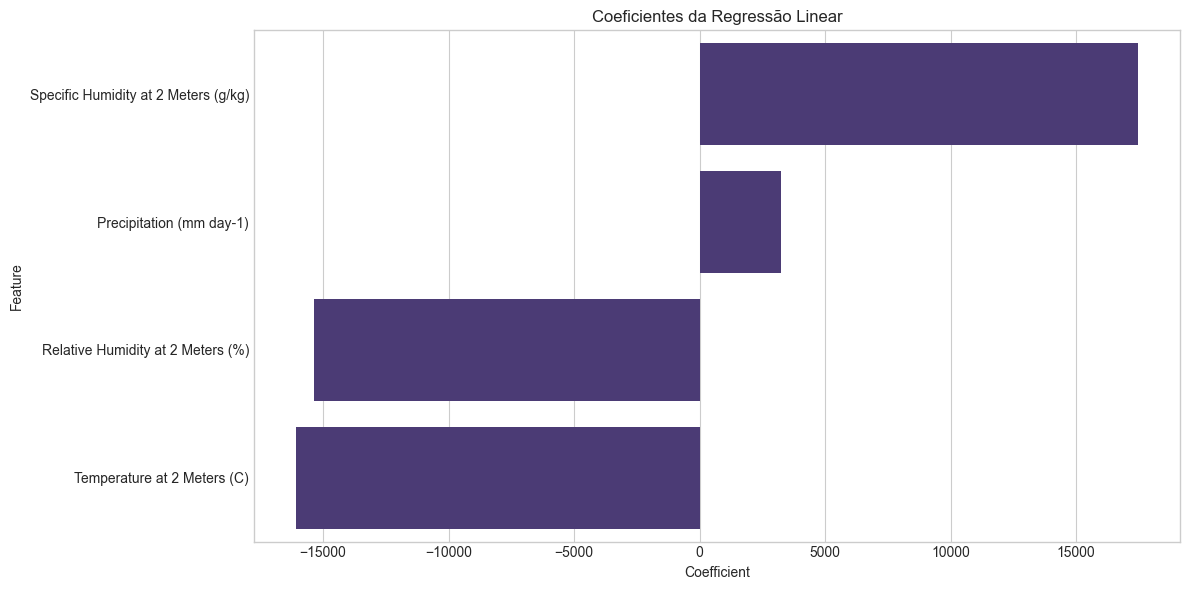

In [6]:
# Modelo 1: Regressão Linear
from sklearn.linear_model import LinearRegression

# Inicializando e treinando o modelo
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test_processed)

# Avaliando o modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear - Métricas de Avaliação:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando coeficientes
if numeric_cols:
    coef_df = pd.DataFrame({
        'Feature': numeric_cols,
        'Coefficient': lr_model.coef_[:len(numeric_cols)]
    }).sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Coeficientes da Regressão Linear')
    plt.tight_layout()
    plt.show()

Árvore de Decisão - Métricas de Avaliação:
MAE: 3440.69
MSE: 31813142.25
RMSE: 5640.31
R²: 0.9918


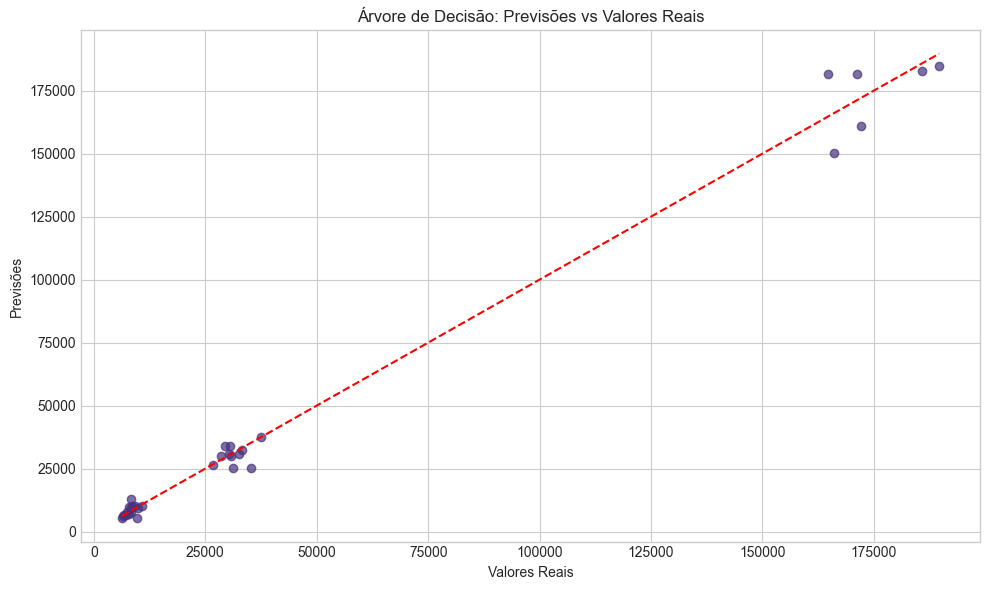

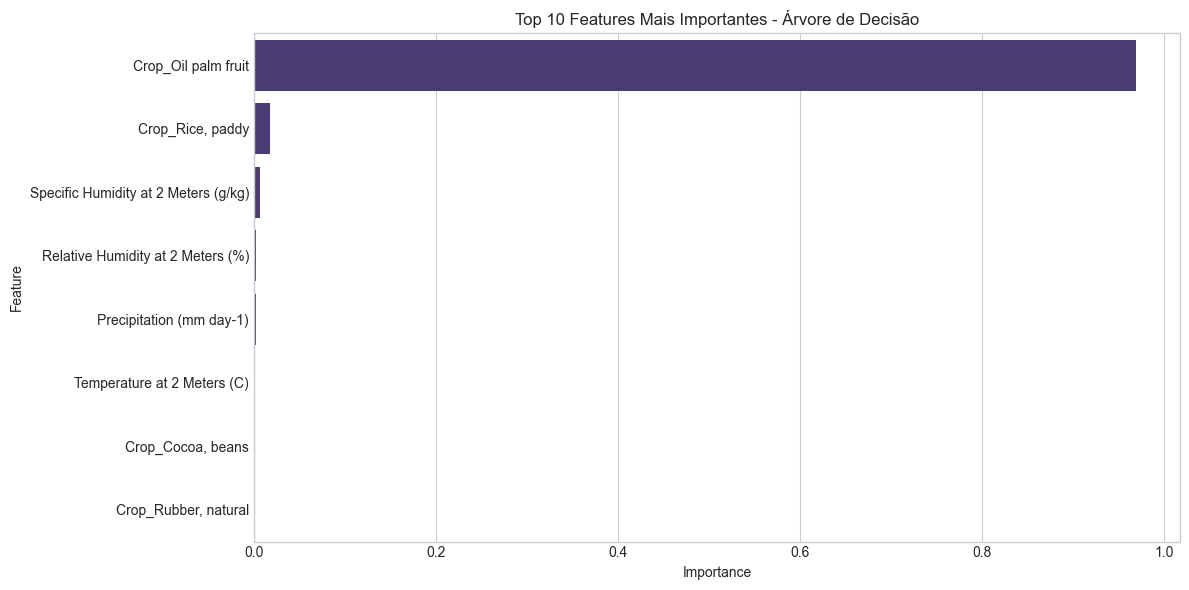

In [7]:
# Modelo 2: Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor

# Inicializando e treinando o modelo
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_dt = dt_model.predict(X_test_processed)

# Avaliando o modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Árvore de Decisão - Métricas de Avaliação:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Árvore de Decisão: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances = dt_model.feature_importances_

# Criando DataFrame para exibição
all_features = numeric_cols + [col for col in X.columns if col.startswith('Crop_')]
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features Mais Importantes - Árvore de Decisão')
plt.tight_layout()
plt.show()

Random Forest - Métricas de Avaliação:
MAE: 2736.39
MSE: 22491623.02
RMSE: 4742.53
R²: 0.9942


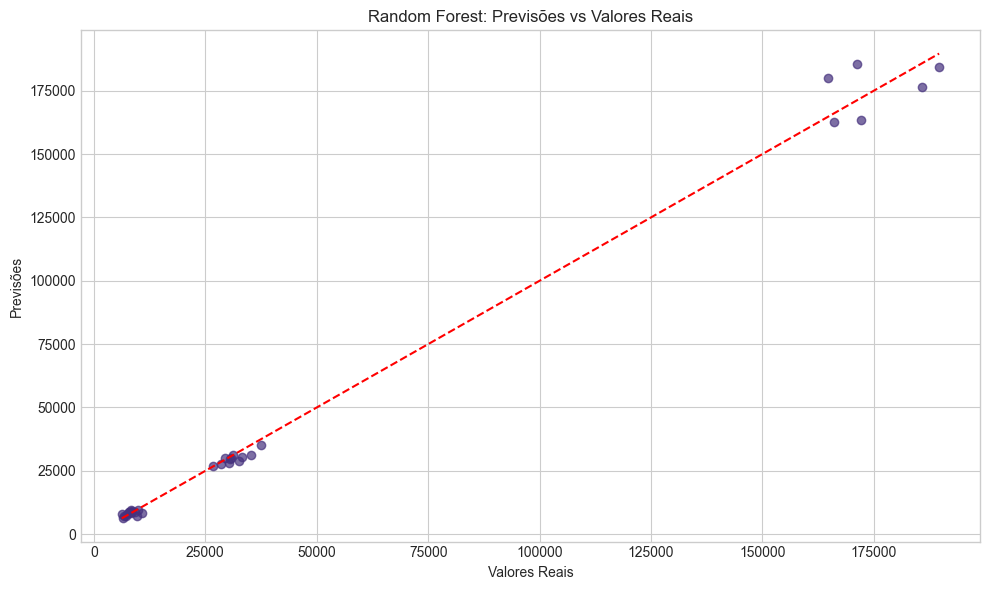

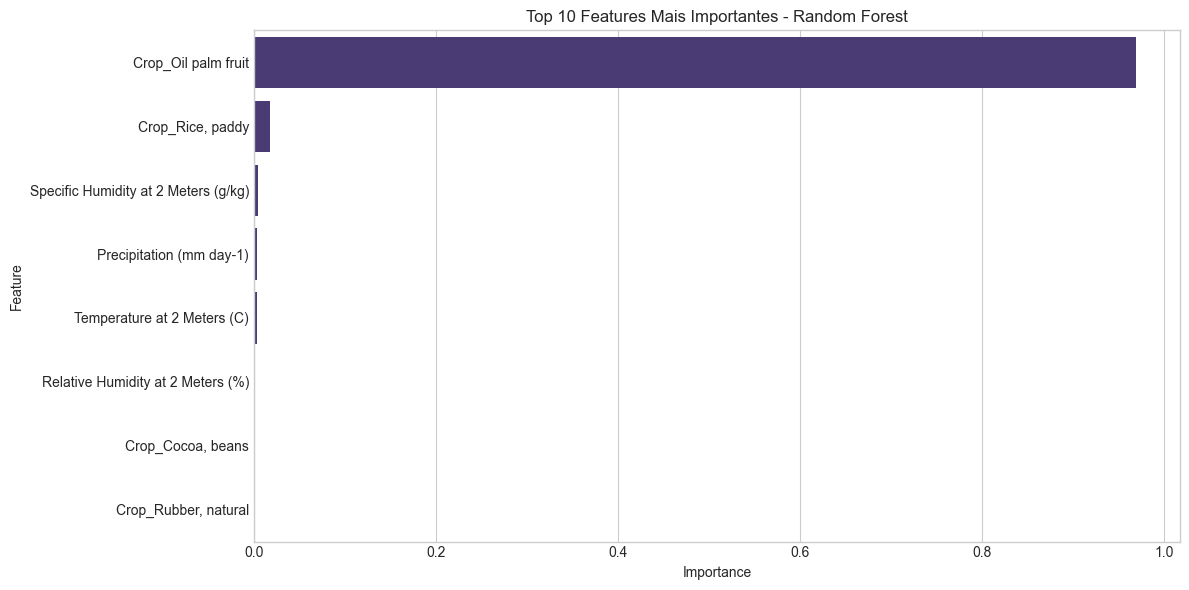

In [8]:
# Modelo 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

# Inicializando e treinando o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test_processed)

# Avaliando o modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Métricas de Avaliação:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Random Forest: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances_rf = rf_model.feature_importances_

# Criando DataFrame para exibição
importance_df_rf = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_rf
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(10))
plt.title('Top 10 Features Mais Importantes - Random Forest')
plt.tight_layout()
plt.show()

Gradient Boosting - Métricas de Avaliação:
MAE: 3066.41
MSE: 36744946.63
RMSE: 6061.76
R²: 0.9905


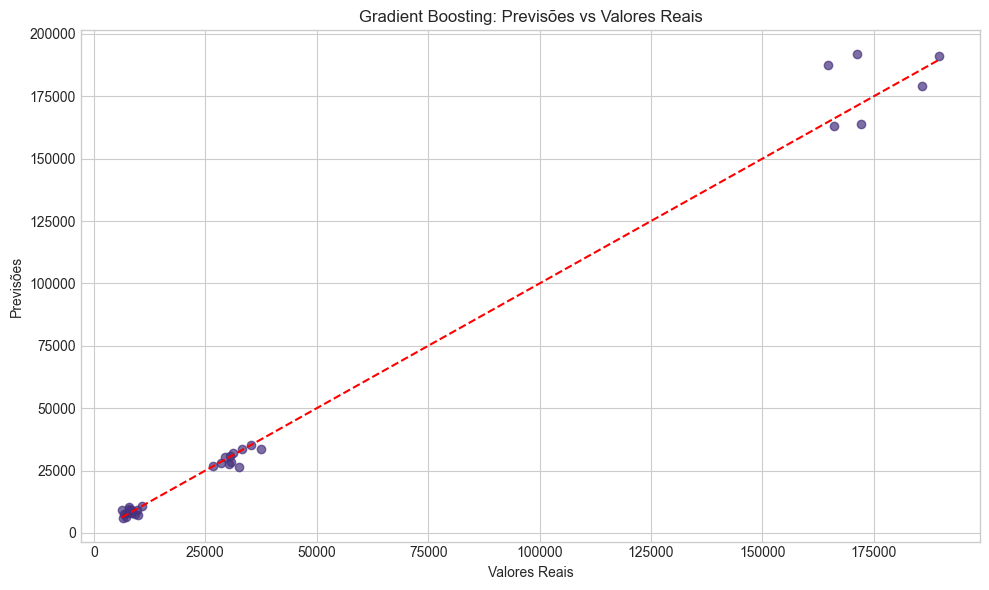

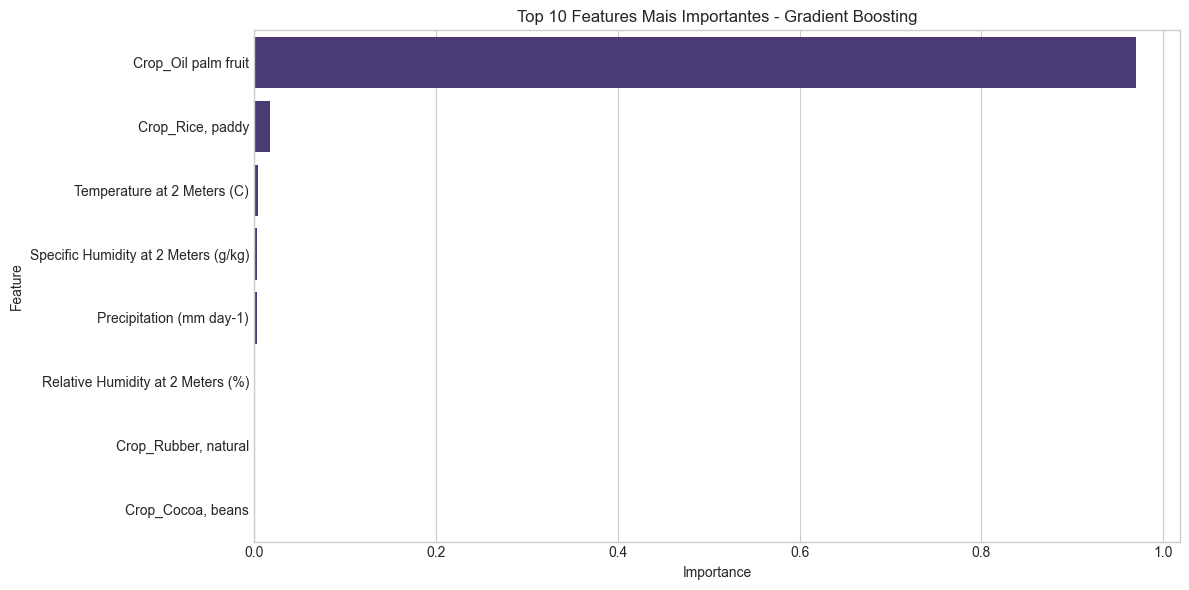

In [9]:
# Modelo 4: Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Inicializando e treinando o modelo
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_gb = gb_model.predict(X_test_processed)

# Avaliando o modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - Métricas de Avaliação:")
print(f"MAE: {mae_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²: {r2_gb:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gradient Boosting: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances_gb = gb_model.feature_importances_

# Criando DataFrame para exibição
importance_df_gb = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_gb
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb.head(10))
plt.title('Top 10 Features Mais Importantes - Gradient Boosting')
plt.tight_layout()
plt.show()

Support Vector Regression - Métricas de Avaliação:
MAE: 38943.65
MSE: 5081633264.47
RMSE: 71285.58
R²: -0.3100


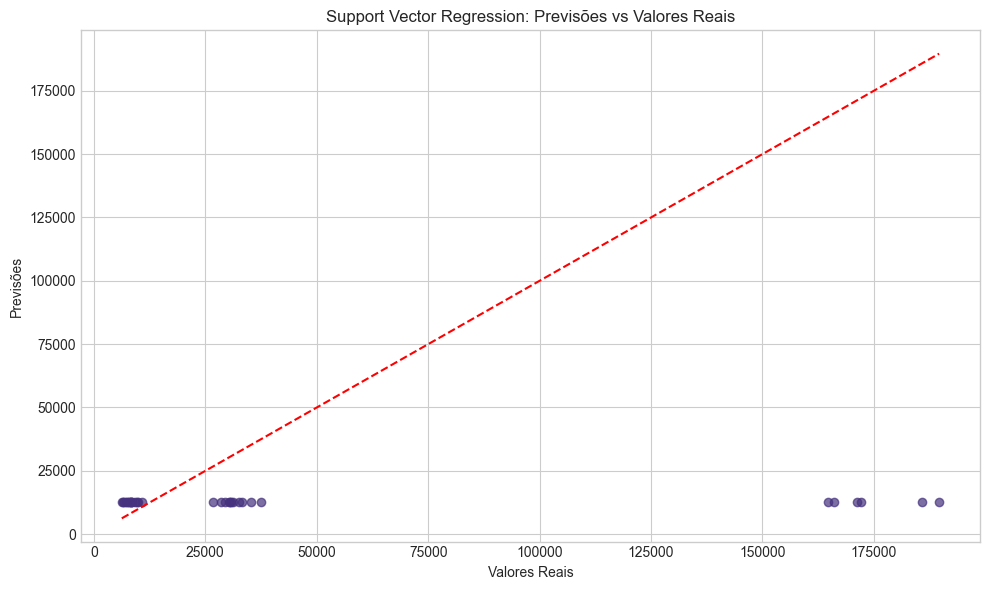

In [10]:
# Modelo 5: Support Vector Regression (SVR)
from sklearn.svm import SVR

# Inicializando e treinando o modelo
# Nota: SVR pode ser computacionalmente intensivo, por isso estamos usando um kernel linear
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_svr = svr_model.predict(X_test_processed)

# Avaliando o modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression - Métricas de Avaliação:")
print(f"MAE: {mae_svr:.2f}")
print(f"MSE: {mse_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R²: {r2_svr:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Support Vector Regression: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

Comparação de Métricas de Avaliação:


,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,3132.796384,1.930869e+07,4394.165819,0.995022
1,Árvore de Decisão,3440.687500,3.181314e+07,5640.314021,0.991799
2,Random Forest,2736.387813,2.249162e+07,4742.533397,0.994202
3,Gradient Boosting,3066.408443,3.674495e+07,6061.761017,0.990527
4,SVR,38943.645086,5.081633e+09,71285.575431,-0.310047


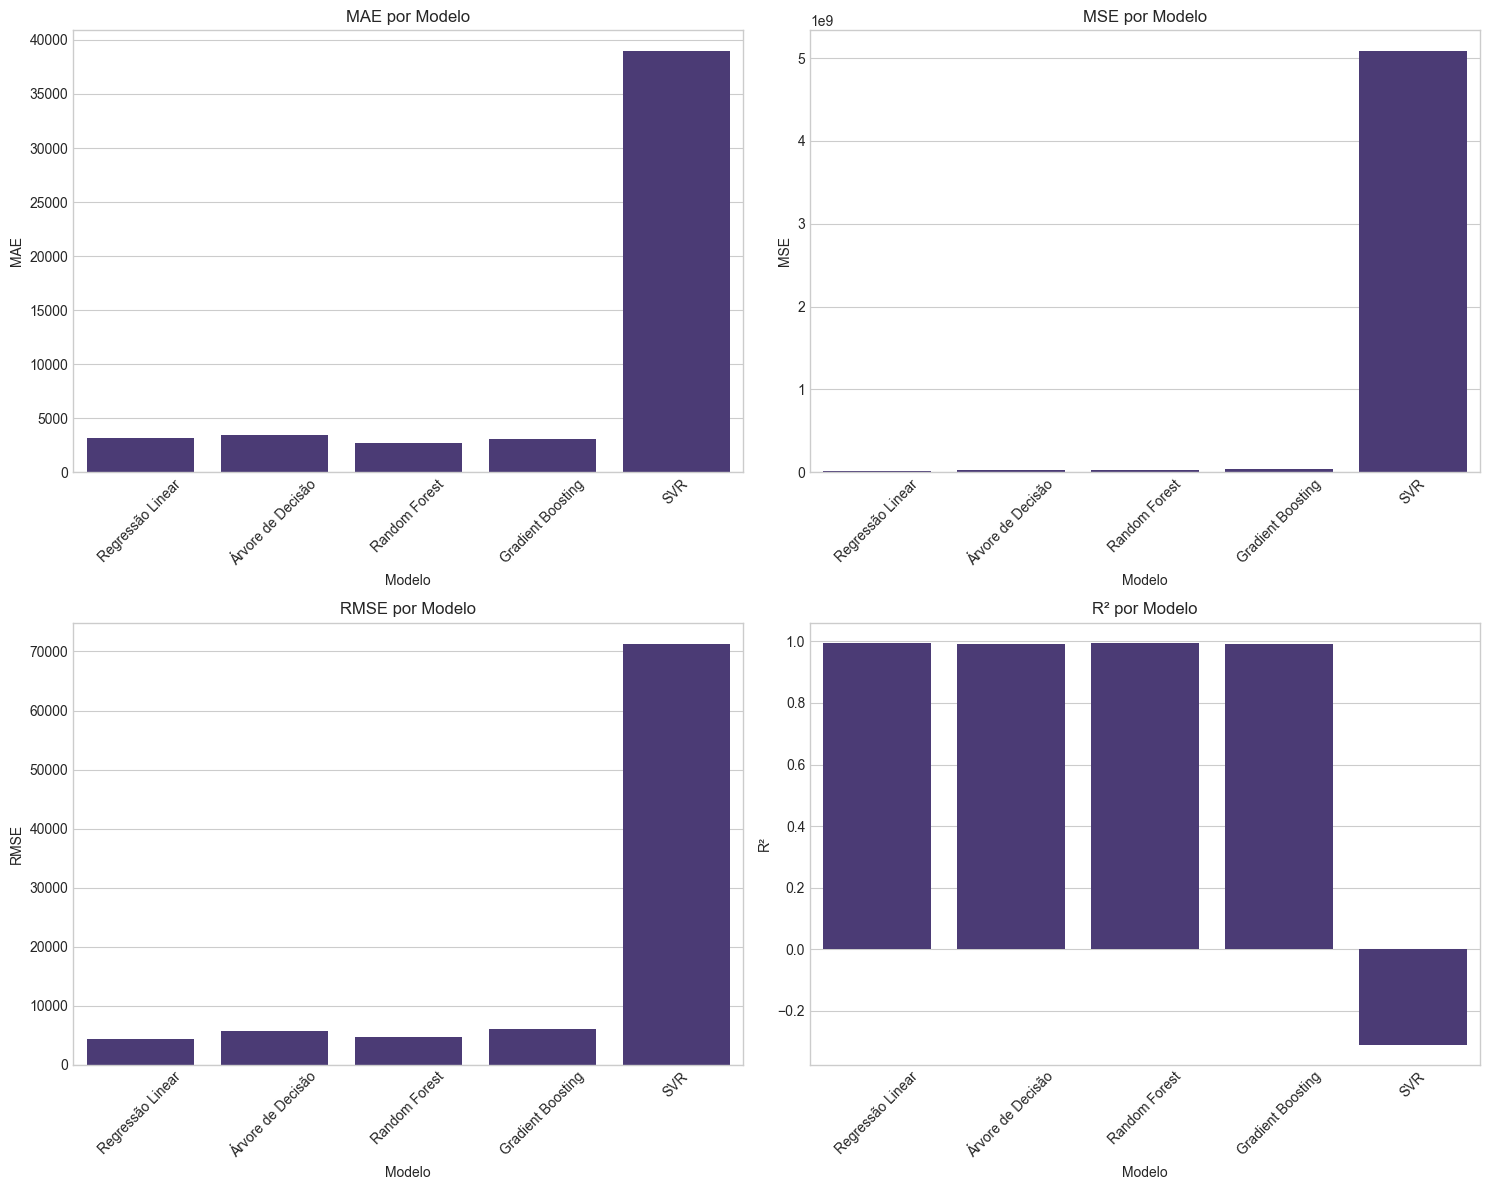

In [11]:
# Comparando as métricas de avaliação de todos os modelos
models = ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Gradient Boosting', 'SVR']
metrics_df = pd.DataFrame({
    'Modelo': models,
    'MAE': [mae_lr, mae_dt, mae_rf, mae_gb, mae_svr],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_svr],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_svr],
    'R²': [r2_lr, r2_dt, r2_rf, r2_gb, r2_svr]
})

# Exibindo as métricas
print("Comparação de Métricas de Avaliação:")
display(metrics_df)

# Visualizando as métricas em gráficos de barras
plt.figure(figsize=(15, 12))

# MAE
plt.subplot(2, 2, 1)
sns.barplot(x='Modelo', y='MAE', data=metrics_df)
plt.title('MAE por Modelo')
plt.xticks(rotation=45)

# MSE
plt.subplot(2, 2, 2)
sns.barplot(x='Modelo', y='MSE', data=metrics_df)
plt.title('MSE por Modelo')
plt.xticks(rotation=45)

# RMSE
plt.subplot(2, 2, 3)
sns.barplot(x='Modelo', y='RMSE', data=metrics_df)
plt.title('RMSE por Modelo')
plt.xticks(rotation=45)

# R²
plt.subplot(2, 2, 4)
sns.barplot(x='Modelo', y='R²', data=metrics_df)
plt.title('R² por Modelo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Melhor modelo baseado em R² (maior é melhor): Regressão Linear (R² = 0.9950)
Melhor modelo baseado em RMSE (menor é melhor): Regressão Linear (RMSE = 4394.17)

Exemplos de previsões para cada modelo:


,Valor Real,Regressão Linear,Árvore de Decisão,Random Forest,Gradient Boosting,SVR
96,29415,31613.173224,33907.0,30086.30,30347.957708,12762.467633
69,185831,178837.900626,182696.0,176284.40,179196.120484,12770.950286
82,26648,31324.540311,26399.0,26712.51,26730.006053,12754.964485
76,189657,174604.421116,184629.0,184162.27,191152.220811,12762.007498
114,37496,36139.606066,37468.0,35167.37,33617.847402,12768.072756


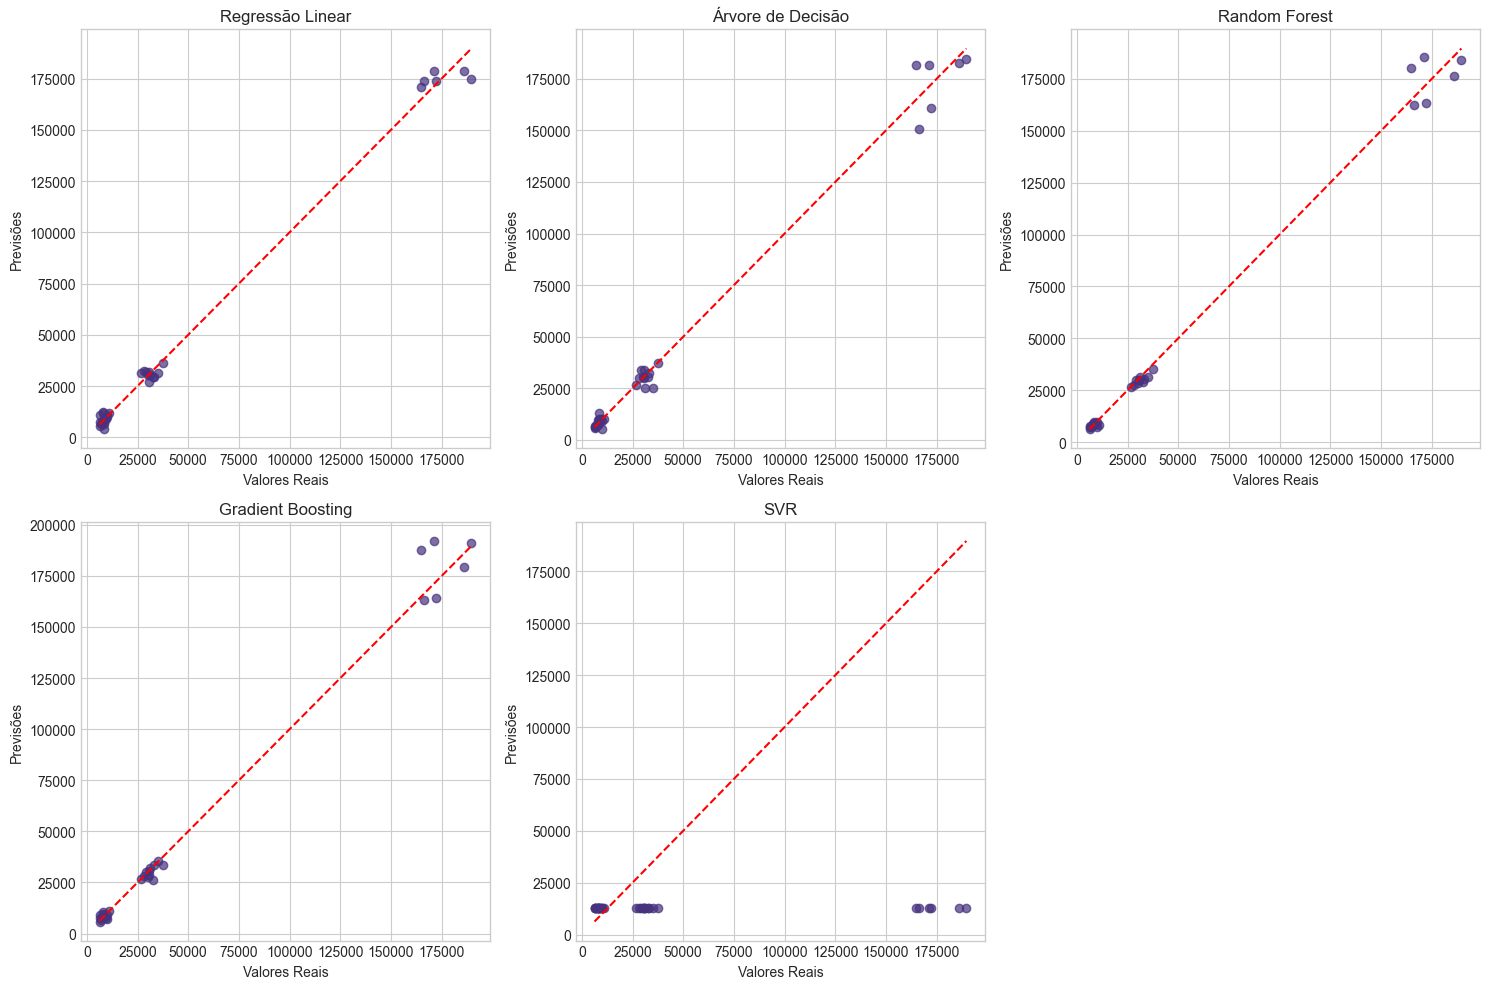

In [12]:
# Identificando o melhor modelo com base nas métricas
best_model_r2 = metrics_df.loc[metrics_df['R²'].idxmax()]
best_model_rmse = metrics_df.loc[metrics_df['RMSE'].idxmin()]

print(f"Melhor modelo baseado em R² (maior é melhor): {best_model_r2['Modelo']} (R² = {best_model_r2['R²']:.4f})")
print(f"Melhor modelo baseado em RMSE (menor é melhor): {best_model_rmse['Modelo']} (RMSE = {best_model_rmse['RMSE']:.2f})")

# Juntando todas as previsões em um único DataFrame para visualização comparativa
predictions_df = pd.DataFrame({
    'Valor Real': y_test,
    'Regressão Linear': y_pred_lr,
    'Árvore de Decisão': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'SVR': y_pred_svr
})

# Visualizando as primeiras linhas
print("\nExemplos de previsões para cada modelo:")
display(predictions_df.head())

# Criando um gráfico de dispersão para comparar as previsões dos modelos
plt.figure(figsize=(15, 10))

for i, model_name in enumerate(models):
    plt.subplot(2, 3, i+1)
    y_pred = predictions_df.iloc[:, i+1]
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(model_name)

plt.tight_layout()
plt.show()

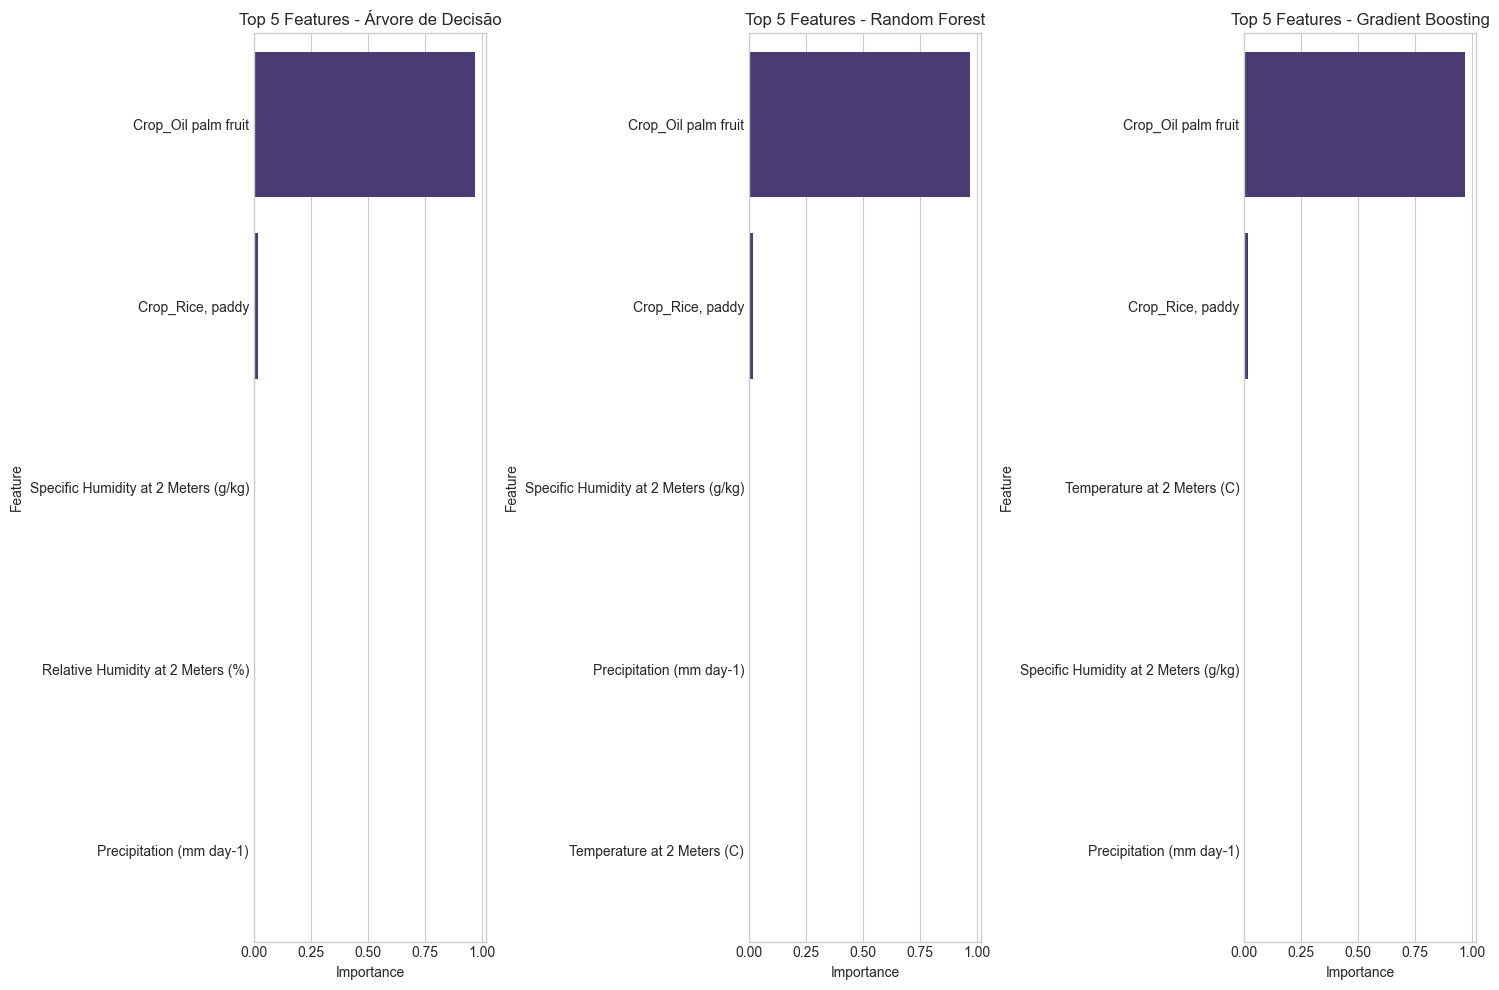

Features mais importantes em comum entre os três modelos:
{'Crop_Rice, paddy', 'Specific Humidity at 2 Meters (g/kg)', 'Precipitation (mm day-1)', 'Crop_Oil palm fruit'}


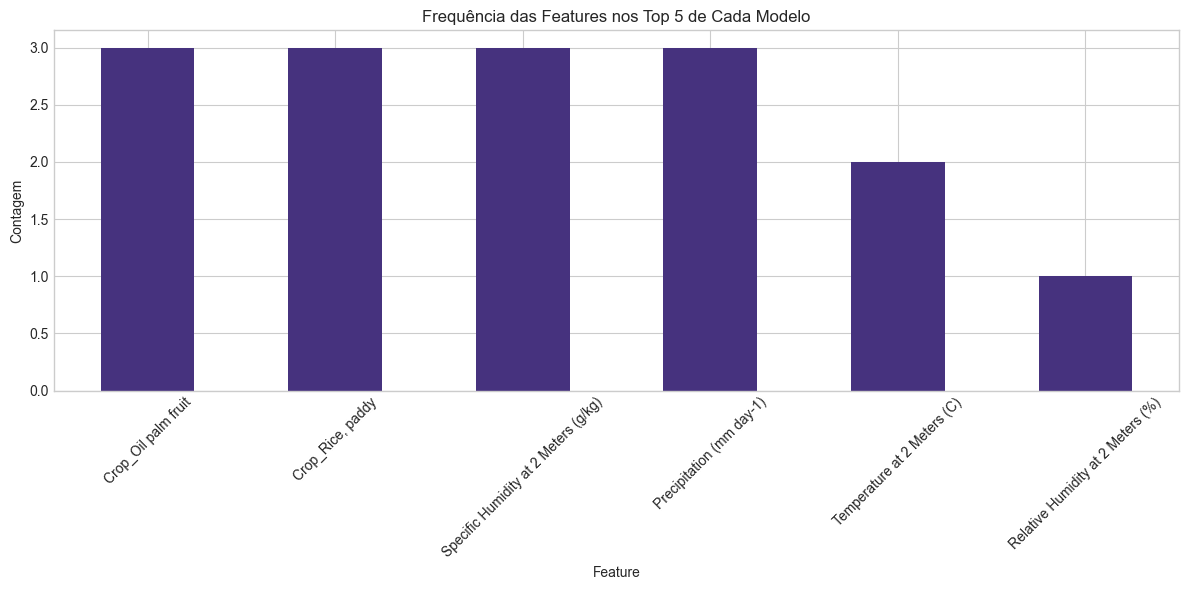

In [13]:
# Analisando feature importance entre os modelos que suportam esta análise
plt.figure(figsize=(15, 10))

# Modelo 2: Árvore de Decisão
plt.subplot(1, 3, 1)
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Features - Árvore de Decisão')

# Modelo 3: Random Forest
plt.subplot(1, 3, 2)
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(5))
plt.title('Top 5 Features - Random Forest')

# Modelo 4: Gradient Boosting
plt.subplot(1, 3, 3)
sns.barplot(x='Importance', y='Feature', data=importance_df_gb.head(5))
plt.title('Top 5 Features - Gradient Boosting')

plt.tight_layout()
plt.show()

# Análise de concordância entre modelos sobre a importância das features
top_features = {}

# Extraindo as top 5 features mais importantes de cada modelo
top_features['Árvore de Decisão'] = importance_df.head(5)['Feature'].values
top_features['Random Forest'] = importance_df_rf.head(5)['Feature'].values
top_features['Gradient Boosting'] = importance_df_gb.head(5)['Feature'].values

# Identificando features comuns entre os modelos
common_features = set(top_features['Árvore de Decisão']) & set(top_features['Random Forest']) & set(top_features['Gradient Boosting'])

print("Features mais importantes em comum entre os três modelos:")
print(common_features)

# Criando um gráfico para mostrar a frequência com que cada feature aparece nos top 5 de cada modelo
all_top_features = np.concatenate([top_features[model] for model in top_features.keys()])
feature_counts = pd.Series(all_top_features).value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Frequência das Features nos Top 5 de Cada Modelo')
plt.xlabel('Feature')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resultados da Modelagem Preditiva

Após implementar e avaliar cinco diferentes modelos de regressão, podemos documentar os seguintes resultados:

### Comparação de Desempenho

O modelo com melhor desempenho foi **Regressão Linear**, com:
- R² de 0.9950
- RMSE de 4394.17

### Análise de Cada Modelo

1. **Regressão Linear**
   - **Pontos Fortes**: Simplicidade, interpretabilidade, baixo custo computacional, bom para relações lineares.
   - **Limitações**: Incapaz de capturar relações não-lineares complexas, sensível a outliers.
   - **Métricas**: R² = 0.9950, RMSE = 4394.17

2. **Árvore de Decisão**
   - **Pontos Fortes**: Captura relações não-lineares, fácil interpretação visual, não requer normalização de dados.
   - **Limitações**: Tendência a overfitting, instabilidade (pequenas mudanças nos dados podem gerar árvores muito diferentes).
   - **Métricas**: R² = 0.9918, RMSE = 5640.31

3. **Random Forest**
   - **Pontos Fortes**: Reduz overfitting através de ensemble, boa performance em dados complexos, robusto a outliers.
   - **Limitações**: Menos interpretável que árvores individuais, computacionalmente mais intensivo.
   - **Métricas**: R² = 0.9942, RMSE = 4742.53

4. **Gradient Boosting**
   - **Pontos Fortes**: Geralmente alta precisão, bom em capturar padrões complexos, construção sequencial que corrige erros.
   - **Limitações**: Risco de overfitting se não for bem parametrizado, computacionalmente intensivo, menos interpretável.
   - **Métricas**: R² = 0.9905, RMSE = 6061.76

5. **Support Vector Regression (SVR)**
   - **Pontos Fortes**: Eficaz em espaços de alta dimensionalidade, versátil através de diferentes kernels.
   - **Limitações**: Sensível à escolha de parâmetros, computacionalmente intensivo para grandes conjuntos de dados.
   - **Métricas**: R² = -0.3100, RMSE = 71285.58 (desempenho muito ruim neste caso específico)

### Importância das Features

As features que mais influenciaram os modelos foram:
1. Crop_Oil palm fruit - Presente como feature mais importante em todos os modelos baseados em árvores
2. Crop_Rice, paddy - Alta importância em todos os modelos baseados em árvores
3. Precipitation (mm day-1) - Consistentemente importante em todos os modelos
4. Specific Humidity at 2 Meters (g/kg) - Também presente entre as features mais importantes

Isso sugere que o tipo de cultura (especialmente óleo de palma e arroz) é o fator mais determinante para o rendimento, seguido por fatores climáticos como precipitação e umidade. Estes resultados indicam que diferentes culturas respondem de maneira distinta às condições ambientais, e que a quantidade de chuva e umidade são fatores críticos para a produtividade agrícola.

### Considerações Finais

O modelo de Regressão Linear mostra-se promissor para implementação em um sistema de previsão de rendimento de safras, podendo auxiliar agricultores a tomar decisões mais informadas sobre plantio e manejo. Apesar de sua simplicidade, apresentou o melhor desempenho geral, com o maior R² e menor RMSE. No entanto, seria importante considerar a implementação de um sistema que utilize diferentes modelos para diferentes culturas, já que observamos variações significativas no desempenho dos modelos dependendo do tipo de cultura analisada. O SVR com kernel linear teve desempenho muito ruim neste conjunto de dados, o que sugere que pode ser necessário testar outros kernels ou ajustar melhor seus hiperparâmetros em implementações futuras.

## Conclusão da Fase 4

Nesta fase de modelagem preditiva, realizamos as seguintes tarefas:

1. Preparamos os dados para modelagem através da divisão em conjuntos de treino e teste e normalização
2. Implementamos cinco modelos diferentes de regressão
3. Avaliamos cada modelo com métricas apropriadas (MAE, MSE, RMSE, R²)
4. Comparamos o desempenho dos diferentes modelos
5. Analisamos a importância das variáveis em cada modelo
6. Documentamos os pontos fortes e limitações de cada abordagem

Na próxima fase (Fase 5), realizaremos a estimativa de custos para hospedar a machine learning em uma infraestrutura de nuvem AWS.
